# **0. Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Load Dataset**

In [ ]:
data = sns.load_dataset('iris')

# **2. Data Understanding**

## **2.0. Display Dataset's First Five Rows**

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **2.1. Display Dataset's Last Five Rows**

In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## **2.2. Display Dataset's Basic Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **3. Exploratory Data Analysis**

## **3.0. Display Dataset's Statistics Information**

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **3.1. Display Dataset's Distribution Data**

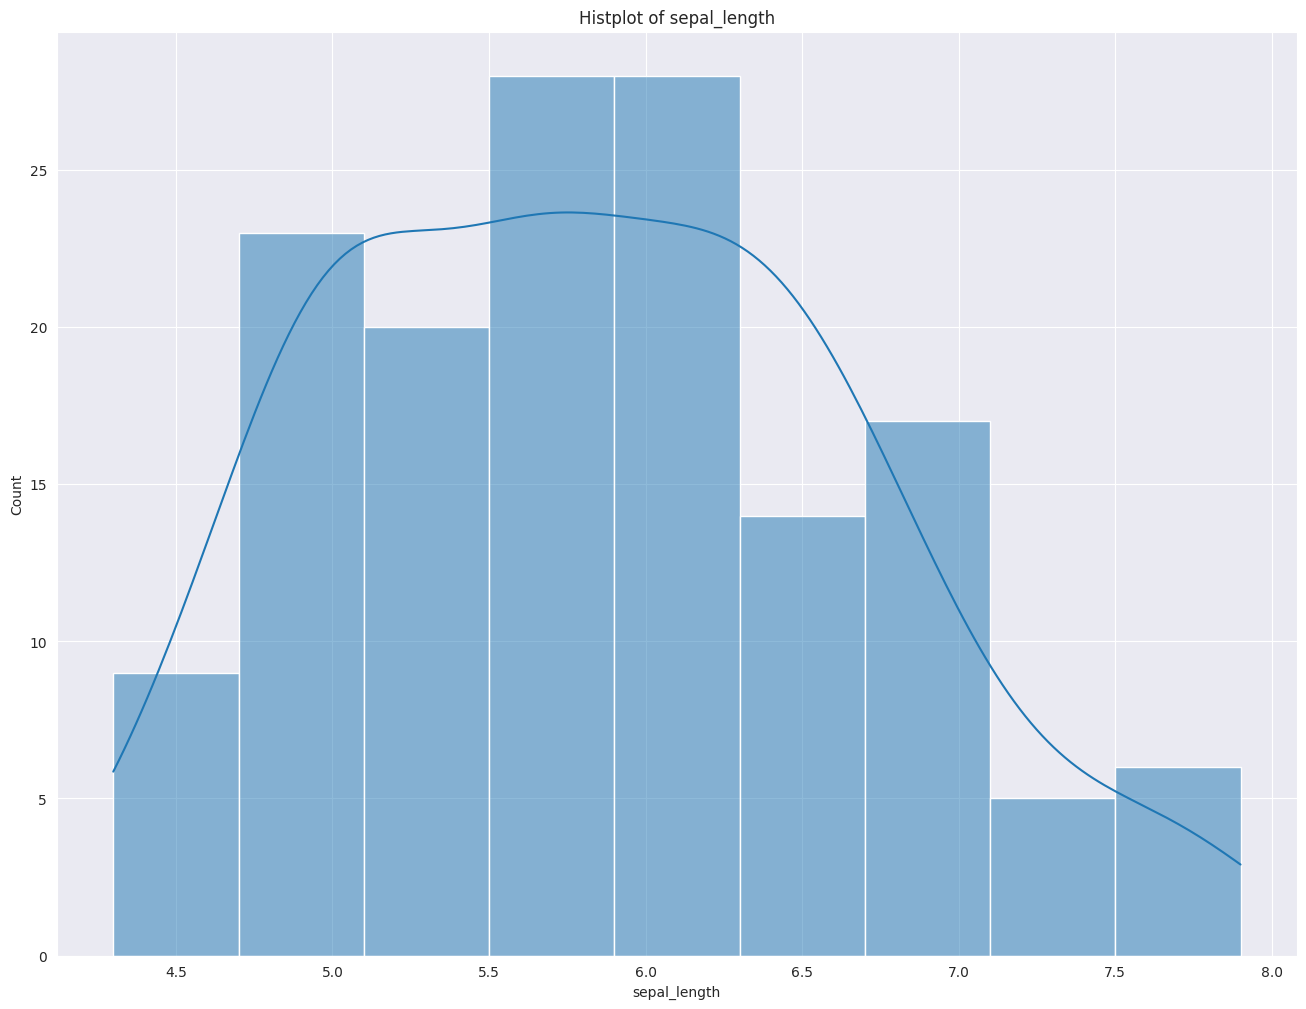

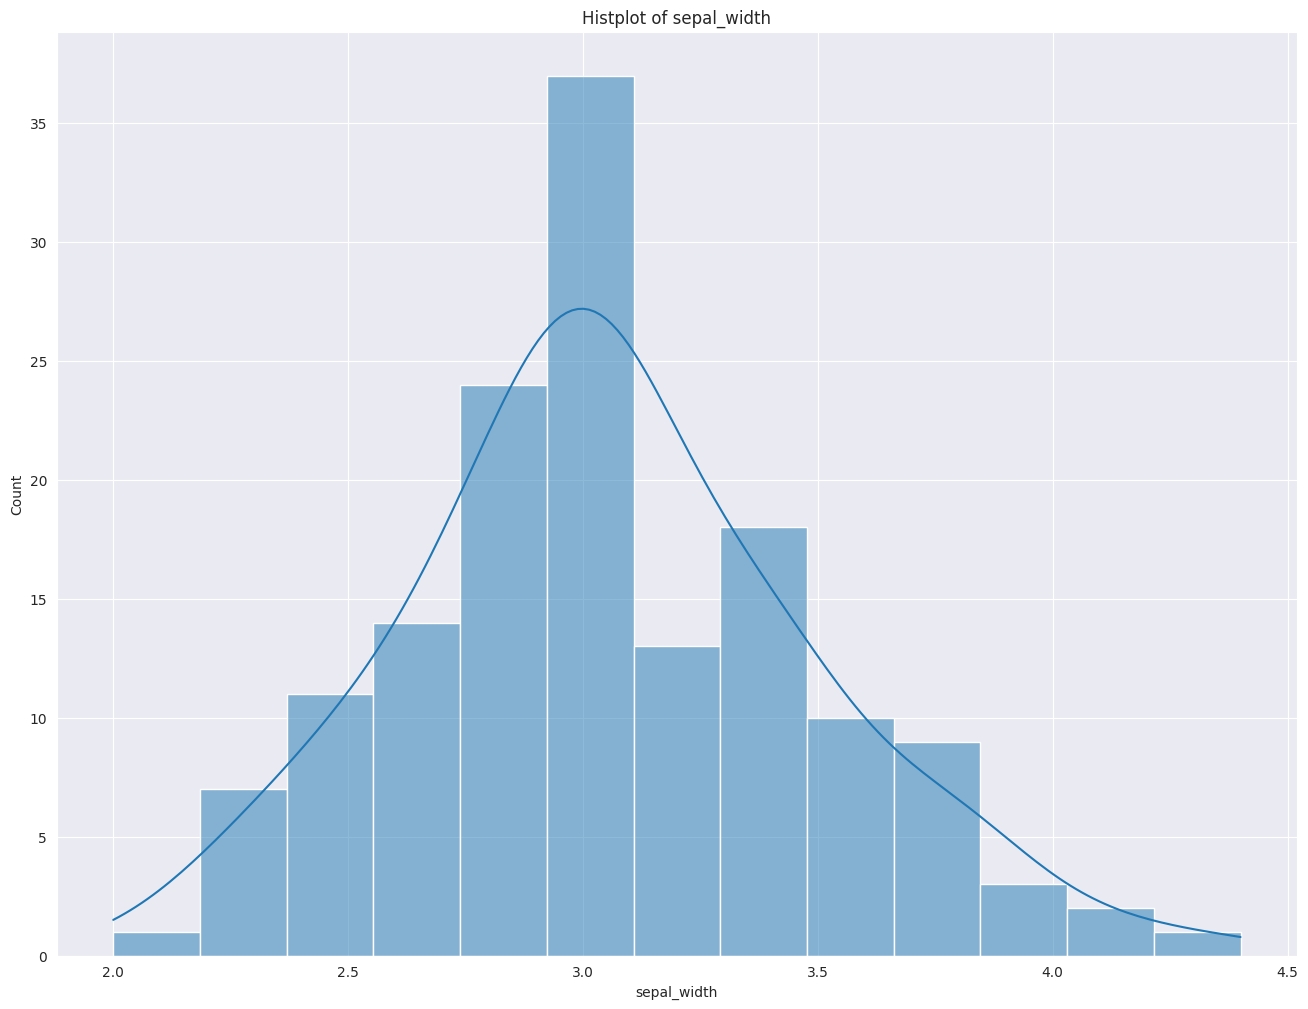

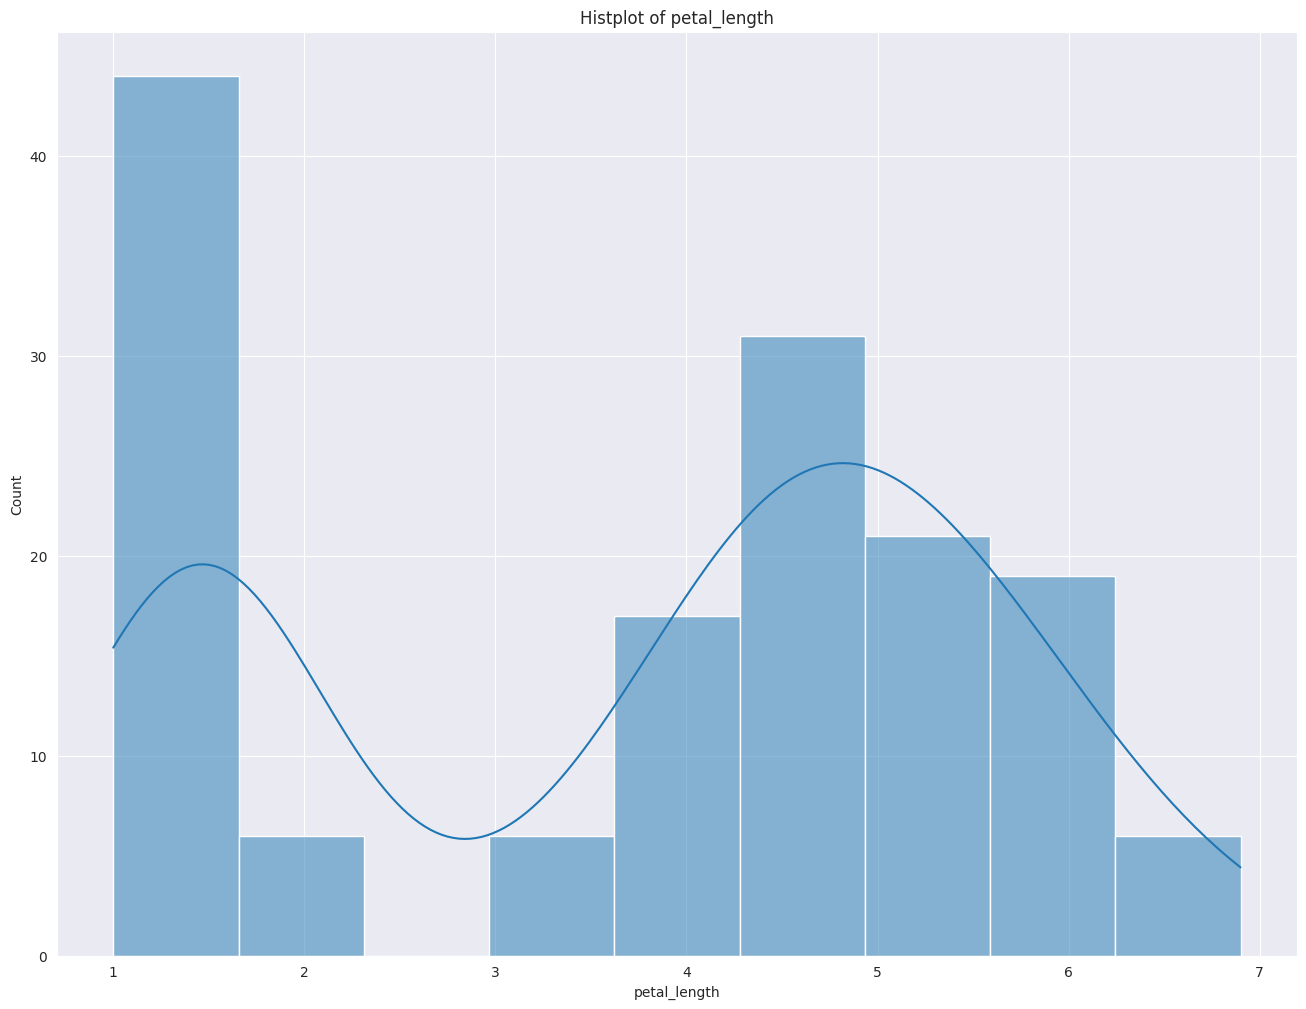

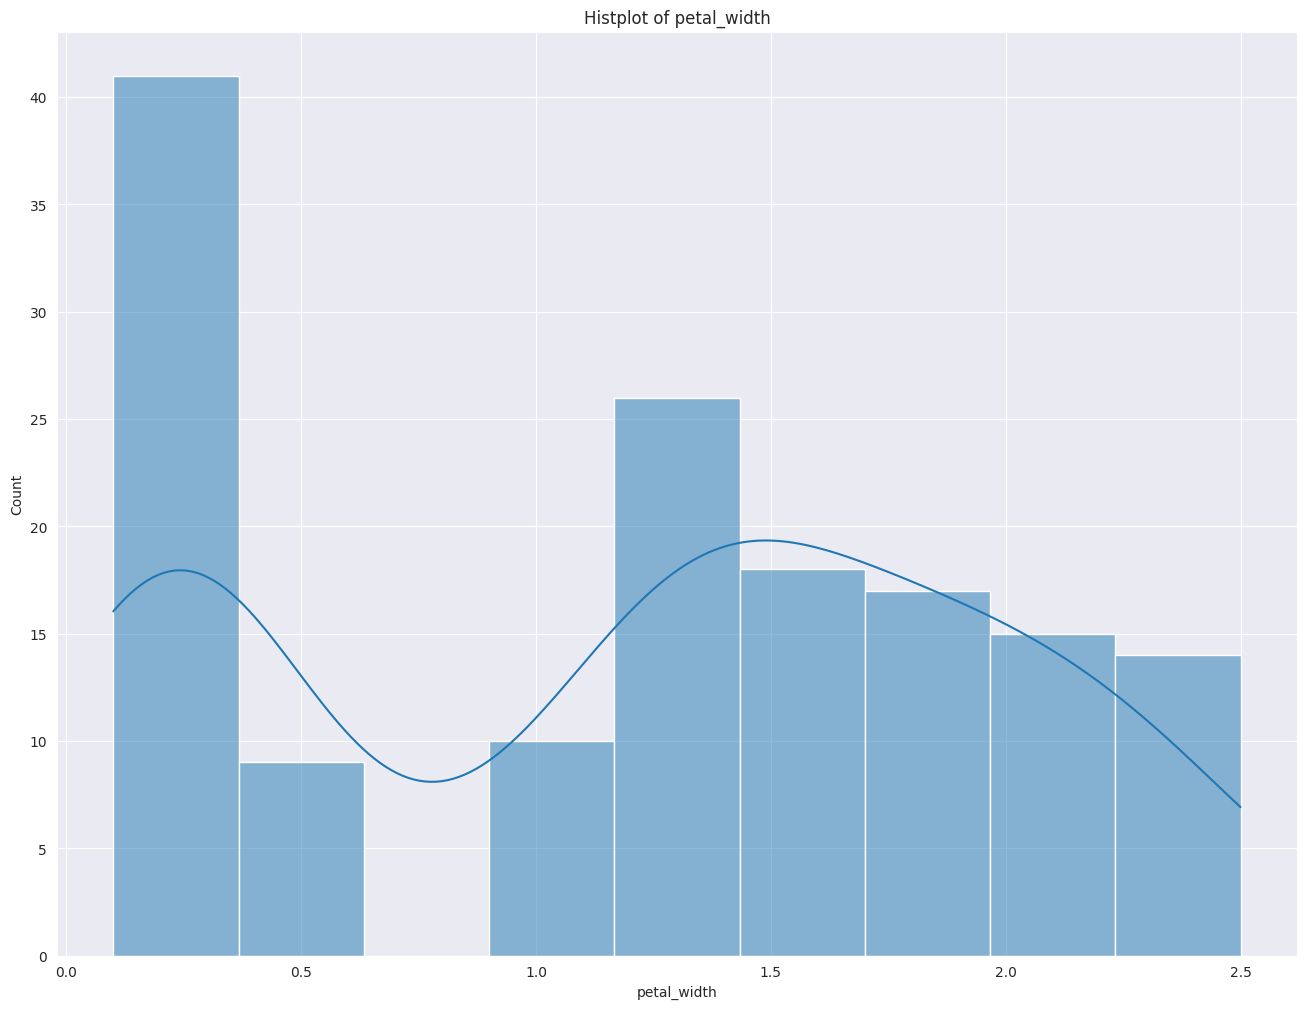

In [ ]:
sns.set_style('darkgrid')

numerical_columns = data.select_dtypes('number').columns

for column in numerical_columns:
    plt.figure(figsize=(16, 12))
    sns.histplot(data=data, x=data[column], kde=True)
    plt.title(f'Histplot of {column}')
    plt.show()

## **3.2. Display Target Variable's Countplot**

[]

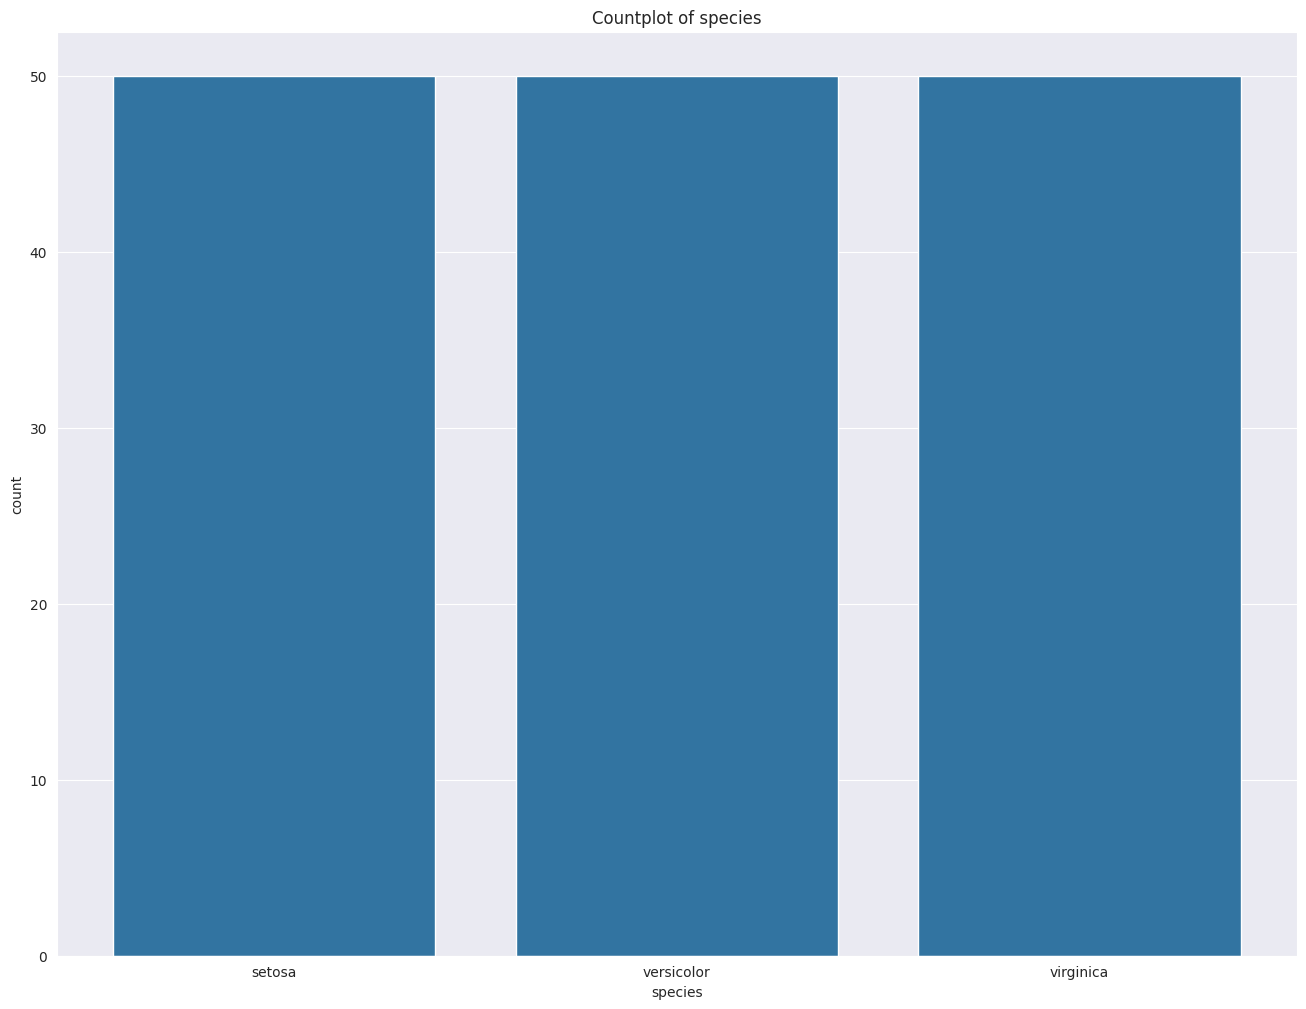

In [ ]:
plt.figure(figsize=(16, 12))
sns.countplot(data=data, x=data['species'])
plt.title('Countplot of species')
plt.plot()

# **4. Data Preprocessing**

## **4.0. Display Dataset's Missing Values**

In [ ]:
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


## **4.1. Display Dataset's Duplicated Values**

In [ ]:
data.duplicated().sum()

np.int64(1)

# **5. Model Building**

## **5.0. Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5.1. Model Development**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Set Accuracy: {training_accuracy * 100:.2f}%')
print(f'Testing Set Accuracy: {testing_accuracy * 100:.2f}%\n')

training_report = classification_report(y_train, y_train_pred)
testing_report = classification_report(y_test, y_test_pred)

print(f'Training Set Report:\n{training_report}\n')
print(f'Testing Set Report:\n{testing_report}')

Training Set Accuracy: 100.00%
Testing Set Accuracy: 100.00%

Training Set Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        41
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Testing Set Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **5.2. Save Model into Joblib File**

In [ ]:
import joblib

filename = 'iris-model.joblib'
joblib.dump(model, filename)

['iris-model.joblib']